# EDA

### Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style="whitegrid")

### Read in .csv into Pandas DataFrame
- Data: Texas A&M Univ Southern Regional Climate Center's [Climate Data Portal](https://www.srcc.tamu.edu/climate_data_portal/?product=annual_summaries)
- Station: Nashville Intl Airport (BNA)
- Daily Lister from 01/01/1988 to 11/30/2021

In [2]:
df = pd.read_csv('../data/clean_61.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21916 entries, 0 to 21915
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    21916 non-null  object 
 1   maxt    21916 non-null  int64  
 2   mint    21916 non-null  int64  
 3   avgt    21916 non-null  float64
 4   pcpn    19610 non-null  float64
 5   snow    21187 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,Date,maxt,mint,avgt,pcpn,snow
0,1961-11-30,57,20,38.5,0.00,0.0
1,1961-12-01,60,38,49.0,0.00,0.0
2,1961-12-02,62,52,57.0,NaN,0.0
3,1961-12-03,73,52,62.5,0.00,0.0
4,1961-12-04,70,57,63.5,0.61,0.0


In [5]:
#df[['pcpn', 'snow']] = df[['pcpn', 'snow', 'snwd']].fillna(value=0)

### Convert Date column to datetime datatype

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

### Set Date column as index

In [7]:
idx_df = df.set_index('Date')

In [8]:
df.head(5)

,Date,maxt,mint,avgt,pcpn,snow
0,1961-11-30,57,20,38.5,0.00,0.0
1,1961-12-01,60,38,49.0,0.00,0.0
2,1961-12-02,62,52,57.0,NaN,0.0
3,1961-12-03,73,52,62.5,0.00,0.0
4,1961-12-04,70,57,63.5,0.61,0.0


### Create new columns for Year, Month, and Day

In [9]:
df = df.groupby(pd.Grouper(key='Date', axis=0, freq='Y')).mean()
idx_df['Year'] = idx_df.index.year
idx_df['Month'] = idx_df.index.month
idx_df['Day'] = idx_df.index.day

In [10]:
idx_df.head(200)

,maxt,mint,avgt,pcpn,snow,Year,Month,Day
Date,,,,,,,,
1961-11-30,57,20,38.5,0.00,0.0,1961,11,30
1961-12-01,60,38,49.0,0.00,0.0,1961,12,1
1961-12-02,62,52,57.0,NaN,0.0,1961,12,2
1961-12-03,73,52,62.5,0.00,0.0,1961,12,3
1961-12-04,70,57,63.5,0.61,0.0,1961,12,4
...,...,...,...,...,...,...,...,...
1962-06-13,73,60,66.5,0.00,0.0,1962,6,13
1962-06-14,78,55,66.5,0.00,0.0,1962,6,14
1962-06-15,81,56,68.5,0.00,0.0,1962,6,15


### Create column for Seasons

In [11]:
conditions = [
    (idx_df['Month'] == 12) | (idx_df['Month'] == 1) | (idx_df['Month'] == 2),
    (idx_df['Month'] == 3) | (idx_df['Month'] == 4) | (idx_df['Month'] == 5),
    (idx_df['Month'] == 6) | (idx_df['Month'] == 7) | (idx_df['Month'] == 8),
    (idx_df['Month'] == 9) | (idx_df['Month'] == 10) | (idx_df['Month'] == 11),
]

choices = ['Winter', 'Spring', 'Summer', 'Fall']

idx_df['Season'] = np.select(conditions, choices)

### Group Data by Date

In [12]:
# Annual snowfall data
x = idx_df.groupby(['Year', 'Month'])['snow'].mean()
snow_df = x.unstack()
snow_df.head(5)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.076923
1962,0.095652,0.042308,0.046667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303704
1963,0.251852,0.378261,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.507692
1964,0.161290,0.221053,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1965,0.041379,0.107407,0.121429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [13]:
# Seasonal snowfall data
x = idx_df.groupby(['Year', 'Season'])['snow'].mean()
snw_season_df = x.unstack()
snw_season_df.head(5)

Season,Fall,Spring,Summer,Winter
Year,,,,
1961,0.0,NaN,NaN,0.076923
1962,0.0,0.015730,0.0,0.151316
1963,0.0,0.000000,0.0,0.377632
1964,0.0,0.000000,0.0,0.113580
1965,0.0,0.038202,0.0,0.047126


In [14]:
# Precipitation data
x = idx_df.groupby(['Year', 'Month'])['pcpn'].mean()
pcpn_df = x.unstack()
pcpn_df.head(5)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.283913
1962,0.260400,0.335926,0.226538,0.276400,0.074800,0.316957,0.082083,0.084483,0.334583,0.088077,0.160476,0.091429
1963,0.069565,0.141500,0.358214,0.140417,0.088214,0.110357,0.197407,0.263103,0.127037,0.000000,0.101250,0.082692
1964,0.127586,0.171579,0.211429,0.234400,0.210000,0.041724,0.074483,0.168889,0.094643,0.065357,0.141154,0.183929
1965,0.099333,0.174444,0.245200,0.204286,0.115556,0.094483,0.118571,0.093704,0.179286,0.019000,0.079130,0.038846


In [15]:
# Average Temperature
x = idx_df.groupby(['Year', 'Month'])['avgt'].mean()
avgt_df = x.unstack()
avgt_df.head(10)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.500000,41.032258
1962,35.241935,46.125000,45.274194,56.000000,75.177419,75.000000,79.032258,79.629032,69.300000,62.822581,47.866667,34.983871
1963,30.822581,34.178571,53.741935,61.633333,67.225806,75.850000,77.532258,76.790323,69.966667,65.516129,49.266667,30.516129
1964,38.919355,37.172414,48.919355,62.533333,69.661290,77.633333,78.725806,77.177419,71.300000,56.661290,51.666667,42.612903
1965,39.935484,39.803571,41.838710,60.883333,71.629032,75.100000,78.596774,78.967742,74.066667,59.306452,51.866667,44.806452
1966,32.274194,41.267857,50.419355,58.733333,65.258065,75.066667,82.241935,76.500000,69.516667,57.000000,50.716667,40.129032
1967,42.322581,37.517857,56.967742,63.866667,66.241935,76.283333,75.709677,72.548387,66.750000,59.322581,44.283333,42.532258
1968,34.000000,32.310345,47.822581,58.700000,66.241935,74.833333,77.774194,79.483871,69.916667,59.483871,48.666667,38.096774
1969,37.177419,39.767857,42.532258,60.883333,68.887097,77.183333,82.661290,78.112903,70.716667,60.580645,46.433333,37.258065


### Create DataFrames with individual season and combined spr/fall equinox

In [46]:
# Winter Season
winter_df = idx_df.loc[idx_df['Season'] == 'Winter']
annual_winter_df = winter_df.resample('Y').mean()

In [72]:
# Spring Season
spring_df = idx_df.loc[idx_df['Season'] == 'Spring']
annual_spring_df = spring_df.resample('Y').mean()

In [97]:
# Summer Season
summer_df = idx_df.loc[idx_df['Season'] == 'Summer']
annual_summer_df = summer_df.resample('Y').mean()

In [74]:
# Fall Season
fall_df = idx_df.loc[idx_df['Season'] == 'Fall']
annual_fall_df = fall_df.resample('Y').mean()

In [99]:
# Equinox
equinox_df = idx_df.loc[(idx_df['Season'] == 'Fall') | (idx_df['Season'] == 'Spring')]
annual_equinox_df = equinox_df.resample('Y').mean()

In [163]:
# Annual
annual_df = idx_df.resample('Y').mean()

### Visualize data

[Text(0.5, 1.0, 'Annual Snowfall')]

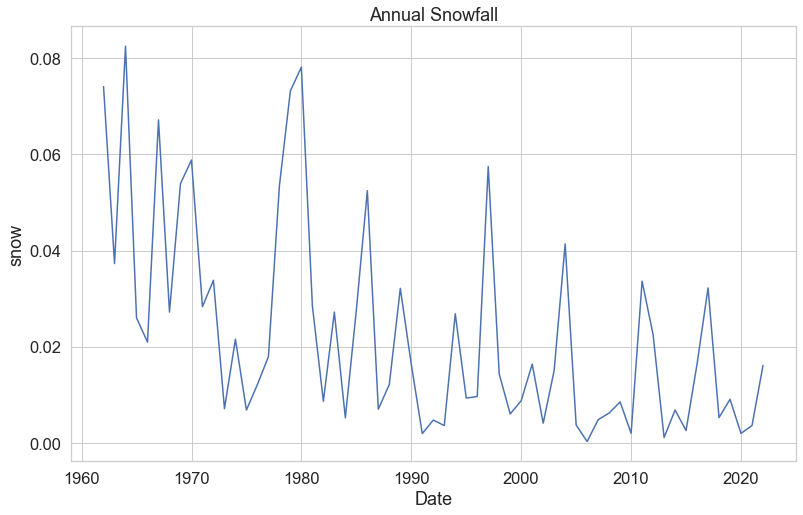

In [149]:
sns.lineplot(
    data = df,
    x = 'Date',
    y = 'snow',
    ci = None
).set(title='Annual Snowfall')

[Text(0.5, 1.0, 'Seasonal Snowfall')]

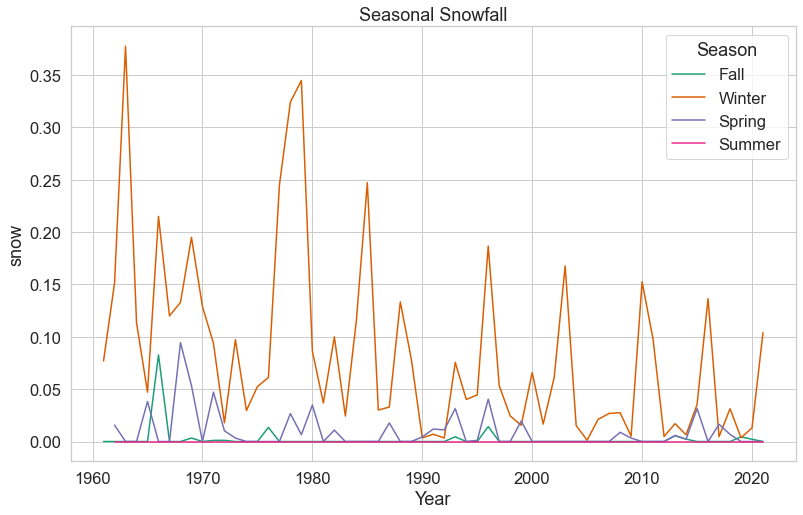

In [46]:
sns.lineplot(x = 'Year', 
             y = 'snow', 
             data = idx_df, 
             hue = 'Season', 
             palette = 'Dark2', 
             ci = None).set(title='Seasonal Snowfall')

<AxesSubplot:xlabel='Month', ylabel='snow'>

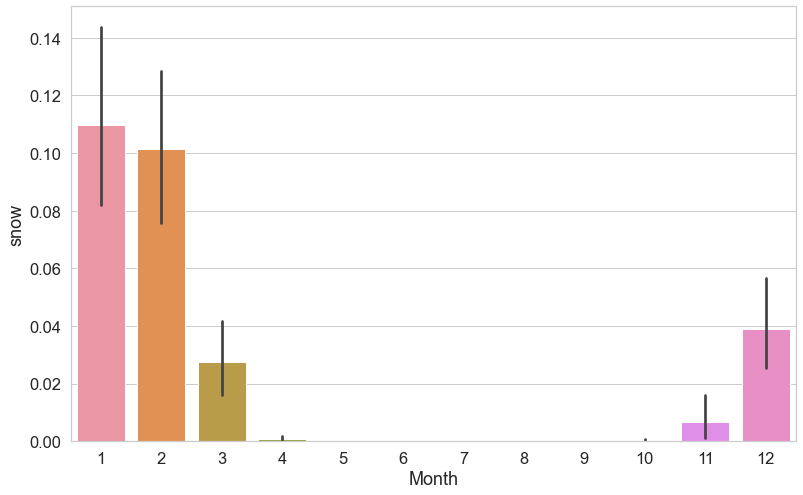

In [179]:
sns.barplot(
    x = 'Month',
    y = 'snow',
    data = idx_df
)

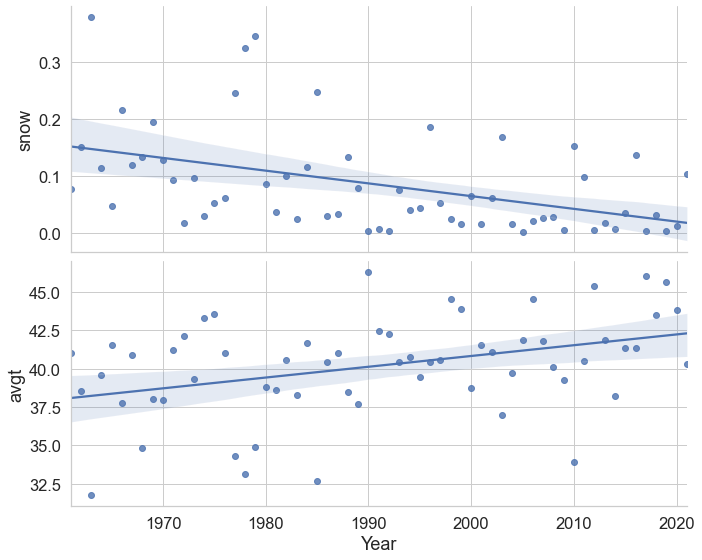

In [160]:
sns.pairplot(
    x_vars = ['Year'],
    y_vars = ['snow', 'avgt'],
    data = annual_winter_df,
    height = 4,
    aspect = 2.5,
    kind = 'reg'
)

Text(0, 0.5, 'Snowfall per Inch')

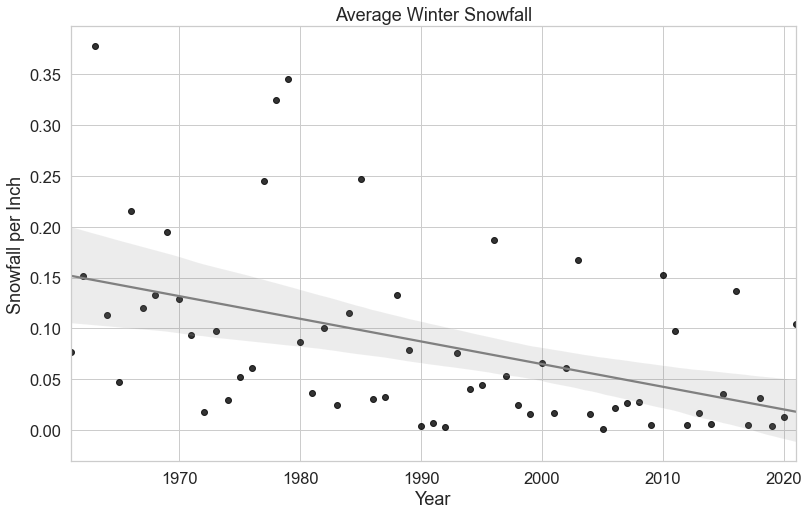

In [137]:
# Winter
sns.regplot(
    y = 'snow',
    x = 'Year',
    data = annual_winter_df, 
    scatter_kws={'color': 'black'}, 
    line_kws={'color': 'grey'}
)
plt.title('Average Winter Snowfall')
plt.ylabel('Snowfall per Inch')

Text(0, 0.5, 'Temp °F')

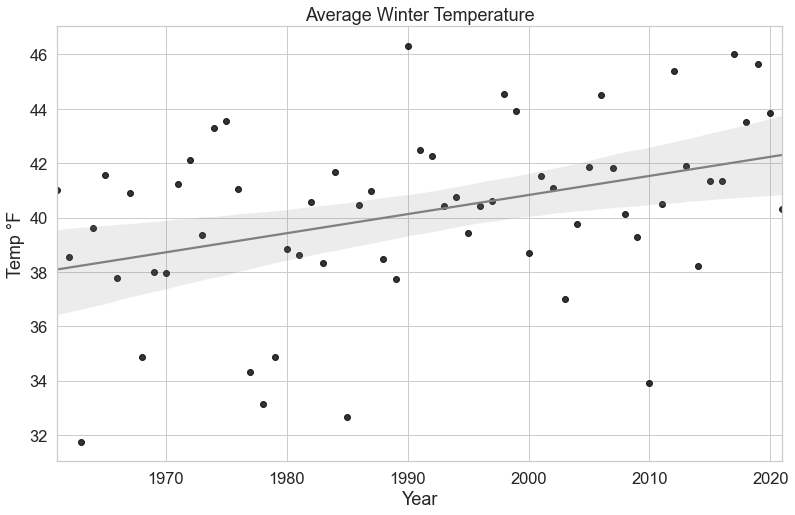

In [133]:
sns.regplot(
    x = 'Year',
    y = 'avgt',
    data = annual_winter_df,
    scatter_kws={'color': 'black'},
    line_kws={'color': 'grey'}
)
plt.title('Average Winter Temperature')
plt.ylabel('Temp °F')

Text(0, 0.5, 'Snowfall per Inch')

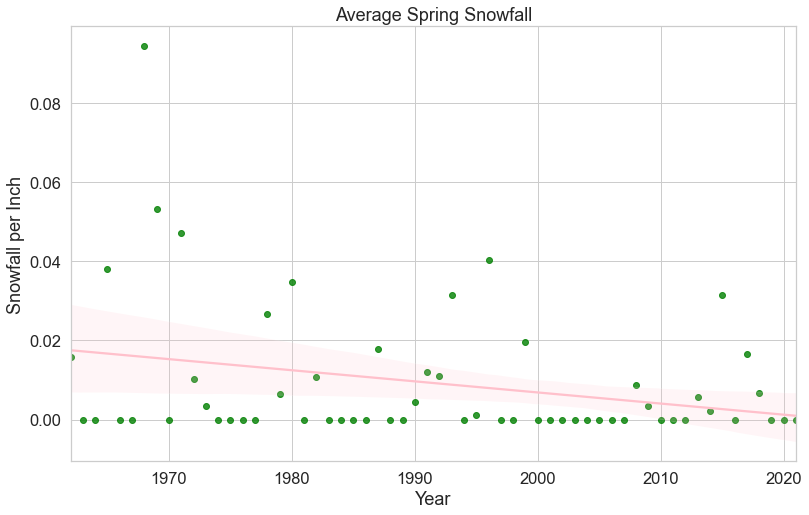

In [138]:
# Spring
sns.regplot(
    x = 'Year',
    y = 'snow',
    data = annual_spring_df,
    scatter_kws={'color': 'green'},
    line_kws={'color': 'pink'}
)
plt.title('Average Spring Snowfall')
plt.ylabel('Snowfall per Inch')

Text(0, 0.5, 'Temp °F')

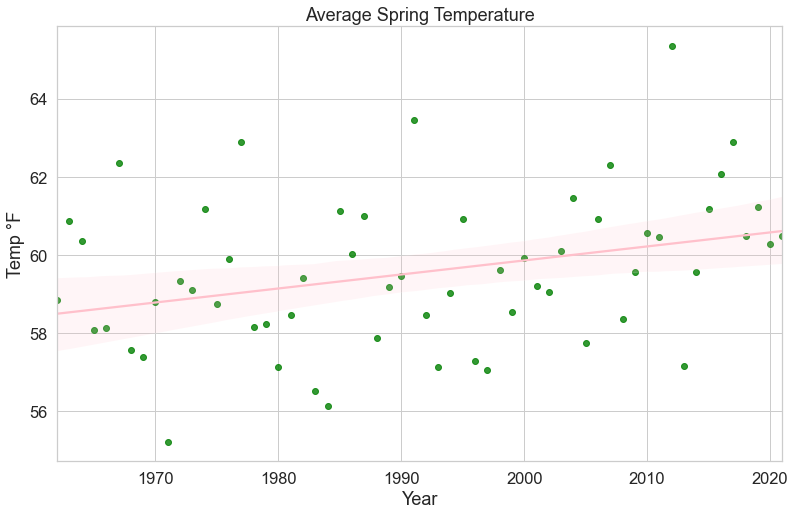

In [132]:
sns.regplot(
    x = 'Year',
    y = 'avgt',
    data = annual_spring_df,
    scatter_kws={'color': 'green'},
    line_kws={'color': 'pink'}
)
plt.title('Average Spring Temperature')
plt.ylabel('Temp °F')

Text(0, 0.5, 'Snowfall per Inch')

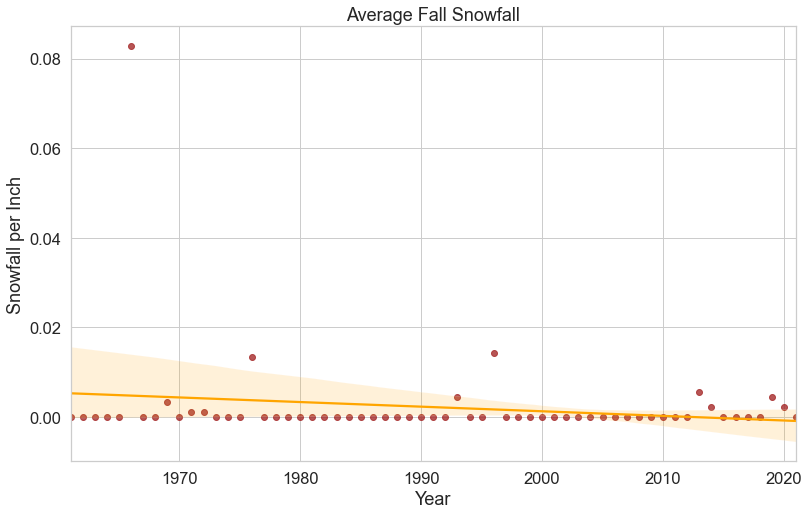

In [139]:
# Fall
sns.regplot(
    x = 'Year',
    y = 'snow',
    data = annual_fall_df,
    scatter_kws={'color': 'brown'},
    line_kws={'color': 'orange'}
)
plt.title('Average Fall Snowfall')
plt.ylabel('Snowfall per Inch')

Text(0, 0.5, 'Temp °F')

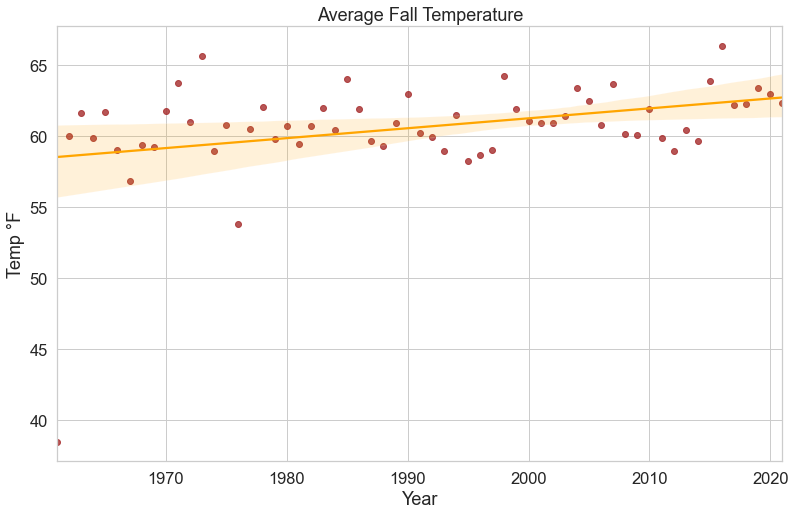

In [131]:
sns.regplot(
    x = 'Year',
    y = 'avgt',
    data = annual_fall_df,
    scatter_kws={'color': 'brown'},
    line_kws={'color': 'orange'}
)
plt.title('Average Fall Temperature')
plt.ylabel('Temp °F')

Text(0, 0.5, 'Temp °F')

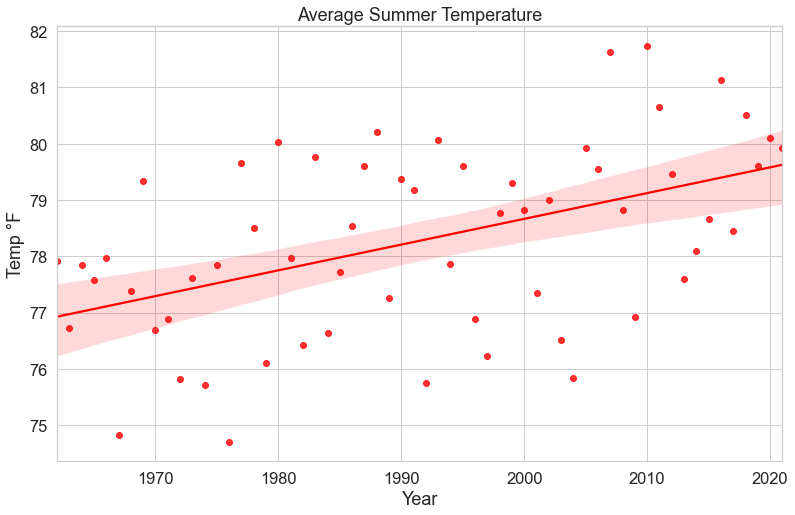

In [130]:
# Summer Average Temp
sns.regplot(
    x = 'Year',
    y = 'avgt',
    data = annual_summer_df,
    scatter_kws={'color': 'red'},
    line_kws={'color': 'red'}
)
plt.title('Average Summer Temperature')
plt.ylabel('Temp °F')

[Text(0.5, 1.0, 'Annual Precipitation')]

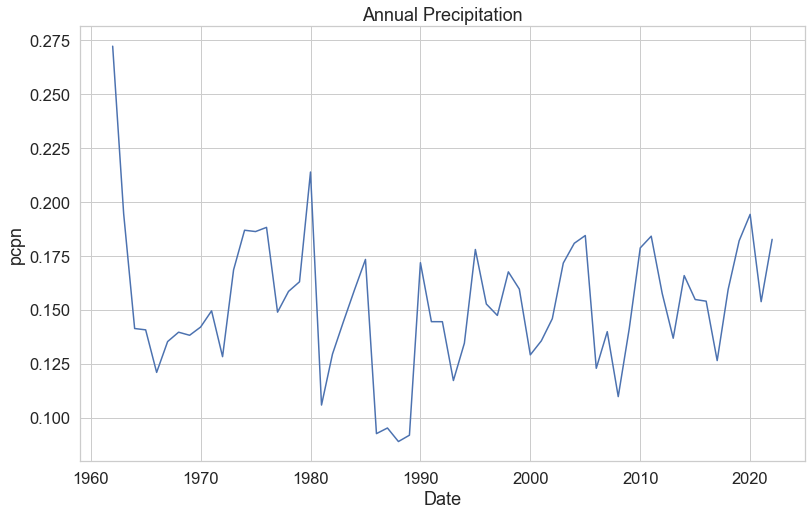

In [150]:
sns.lineplot(
    data = df,
    x = 'Date',
    y = 'pcpn',
    ci = None
).set(title='Annual Precipitation')

[Text(0.5, 1.0, 'Seasonal Precipitation')]

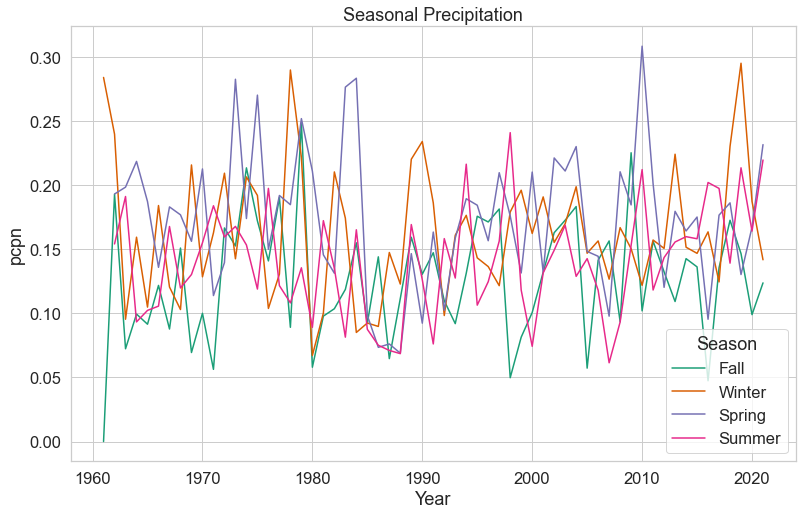

In [181]:
sns.lineplot(x = 'Year', 
             y = 'pcpn', 
             data = idx_df, 
             hue = 'Season', 
             palette = 'Dark2', 
             ci = None).set(title='Seasonal Precipitation')

Text(0, 0.5, 'Precipitation per Inch')

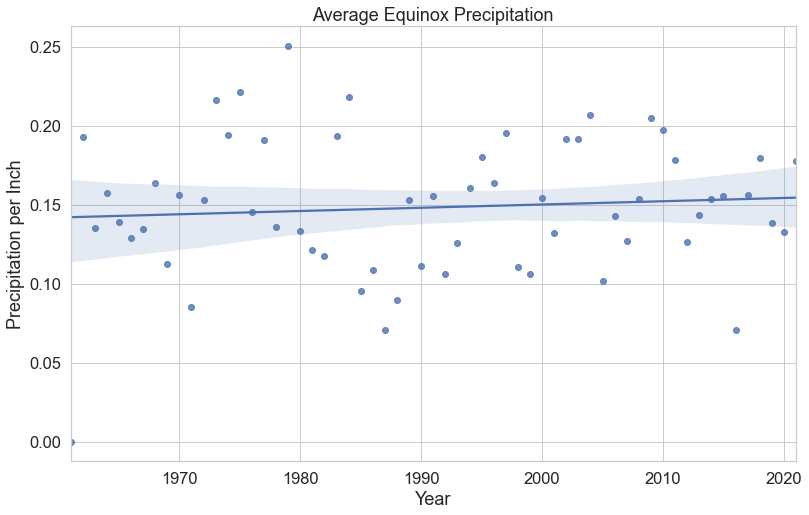

In [140]:
# Annual Equinox Precipitation
sns.regplot(
    x = 'Year',
    y = 'pcpn',
    data = annual_equinox_df
)
plt.title('Average Equinox Precipitation')
plt.ylabel('Precipitation per Inch')

[Text(0.5, 1.0, 'Annual Average Temp')]

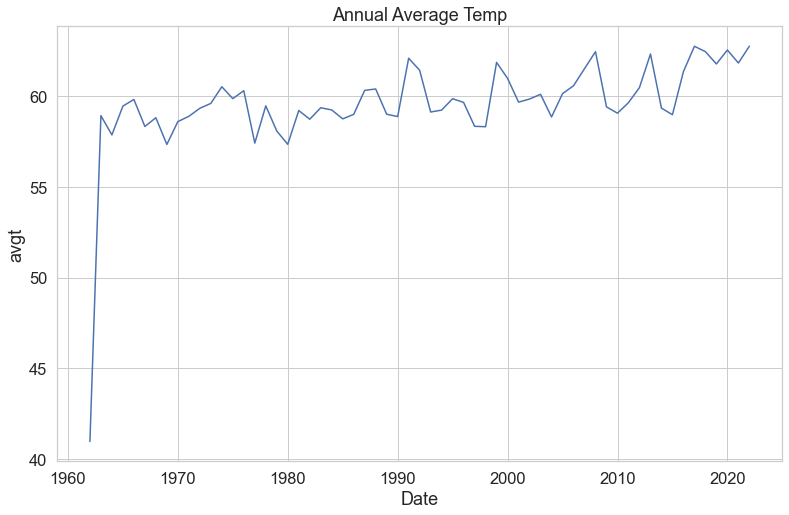

In [151]:
sns.lineplot(
    data = df,
    x = 'Date',
    y = 'avgt',
    ci = None
).set(title='Annual Average Temp')

[Text(0.5, 1.0, 'Seasonal Average Temp')]

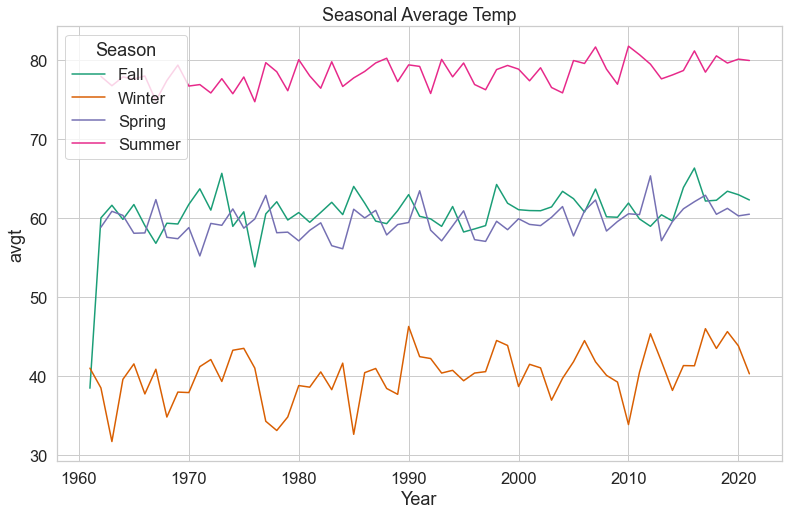

In [44]:
sns.lineplot(x = 'Year', 
             y = 'avgt', 
             data = idx_df, 
             hue = 'Season', 
             palette = 'Dark2', 
             ci = None).set(title='Seasonal Average Temp')

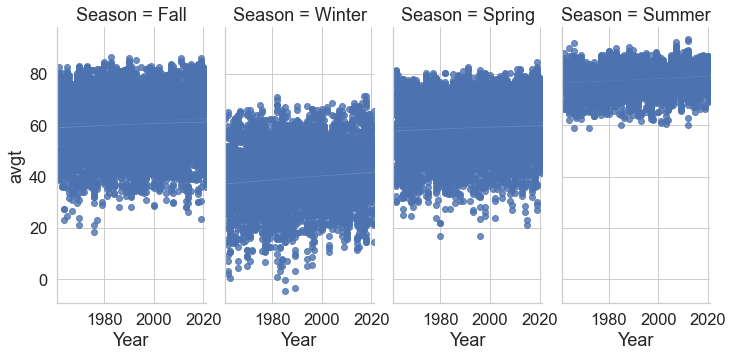

In [173]:
sns.lmplot(x='Year', y='avgt', col='Season', data=idx_df,
           aspect=.5);